# 4.10 Task Part 1.3 - Coding Etiquette and Excel Reporting

### Script contents:

#### Import libraries and data
#### Create an appropriate visualization to show the distribution of profiles
#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### Compare your customer profiles with regions and departments

## Import data and libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
from matplotlib.ticker import ScalarFormatter

In [2]:
# Creating a string of the path to main project folder

path = '/Users/jarrettpugh/Library/CloudStorage/OneDrive-Personal/Data Analytics/Career Foundry - DA Bootcamp/A4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [3]:
# Import active_customers_orders_products pickle file as dataframe df_cop

df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_orders_products.pkl'))

In [14]:
df_cop.shape

(30964564, 38)

#### 6. Create an appropriate visualization to show the distribution of profiles.

In [16]:
# Count how many distinct user_ids there are

distinct_users = df_cop['user_id'].nunique()
print(distinct_users)

162631


In [17]:
# Create df subset with only unique user_id because customer profile frequency needs to use 
#  unique user_ids, not every record of every user_id

unique_user = df_cop.drop_duplicates(subset=['user_id'])

In [18]:
unique_user.shape

(162631, 38)

In [ ]:
unique_user['customer_profile'].value_counts(dropna=False)

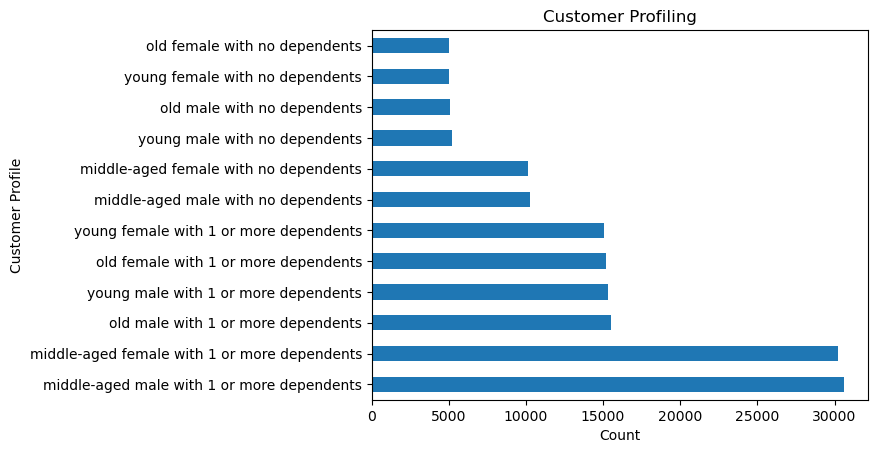

In [21]:
bar_customer_profile = unique_user['customer_profile'].value_counts().plot.barh(
    title='Customer Profiling',
    xlabel= 'Count',
    ylabel= 'Customer Profile'
    )

In [71]:
# Export chart 'bar_customer_profile'

bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [23]:
df_cop.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'department', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'customer_gender', 'customer_state',
       'customer_region', 'customer_age', 'date_joined',
       'customer_number_of_dependents', 'customer_family_status',
       'customer_income', 'customer_activity', 'age_group', 'income_group',
       'customer_dependents', 'customer_diet', 'customer_profile'],
      dtype='object')

In [32]:
# Create subset of df_cop with select columns

profiling_agg = df_cop[['customer_profile', 'order_id', 'max_order', 'prices']]

In [33]:
profiling_agg.shape

(30964564, 4)

In [37]:
# Find aggregated max, mean, and min of order frequency (max_order), exependiture (prices) grouped by customer_profile

profiling_agg.groupby('customer_profile').agg({'max_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

max_order                prices  \
                                                   min       mean max    min   
customer_profile                                                               
middle-aged female with 1 or more dependents         5  34.594973  99    1.0   
middle-aged female with no dependents                5  34.852005  99    1.0   
middle-aged male with 1 or more dependents           5  34.176738  99    1.0   
middle-aged male with no dependents                  5  35.169615  99    1.0   
old female with 1 or more dependents                 5  34.424728  99    1.0   
old female with no dependents                        5  35.754420  99    1.0   
old male with 1 or more dependents                   5  34.207017  99    1.0   
old male with no dependents                          5  33.116943  99    1.0   
young female with 1 or more dependents               5  34.193681  99    1.0   
young female with no dependents                      5  34.392906  99    1.0   
young male with 1 or more dependents                 5  34.372864  99    1.0   
young male with no dependents                        5  34.059118  99    1.0   

                                                                  
                                                   mean      max  
customer_profile                                                  
middle-aged female with 1 or more dependents  11.880362  99999.0  
middle-aged female with no dependents         11.511457  99999.0  
middle-aged male with 1 or more dependents    11.935716  99999.0  
middle-aged male with no dependents           12.518140  99999.0  
old female with 1 or more dependents          11.304812  99999.0  
old female with no dependents                 11.808883  99999.0  
old male with 1 or more dependents            12.192343  99999.0  
old male with no dependents                   12.321716  99999.0  
young female with 1 or more dependents        12.524777  99999.0  
young female with no dependents               11.831091  99999.0  
young male with 1 or more dependents          11.376542  99999.0  
young male with no dependents                 12.783665  99999.0

#### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [ ]:
# Group unique user customer profiles by customer region

In [ ]:
# Unique user id, customer region, and customer profile

unique_user[['user_id', 'customer_region', 'customer_profile']]

In [41]:
# Add another column to subset of df_cop

profiling_agg = df_cop[['customer_region', 'customer_profile', 'order_id', 'max_order', 'prices']]

In [62]:
# Find aggregated max, mean, and min of order frequency (max_order), exependiture (prices) grouped by customer region and customer profile

regional_profiling = profiling_agg.groupby(['customer_region', 'customer_profile']).agg({
    'max_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [63]:
regional_profiling

max_order  \
                                                                   min   
customer_region customer_profile                                         
Midwest         middle-aged female with 1 or more dependents         5   
                middle-aged female with no dependents                5   
                middle-aged male with 1 or more dependents           5   
                middle-aged male with no dependents                  5   
                old female with 1 or more dependents                 5   
                old female with no dependents                        5   
                old male with 1 or more dependents                   5   
                old male with no dependents                          5   
                young female with 1 or more dependents               5   
                young female with no dependents                      5   
                young male with 1 or more dependents                 5   
                young male with no dependents                        5   
Northeast       middle-aged female with 1 or more dependents         5   
                middle-aged female with no dependents                5   
                middle-aged male with 1 or more dependents           5   
                middle-aged male with no dependents                  5   
                old female with 1 or more dependents                 5   
                old female with no dependents                        5   
                old male with 1 or more dependents                   5   
                old male with no dependents                          5   
                young female with 1 or more dependents               5   
                young female with no dependents                      5   
                young male with 1 or more dependents                 5   
                young male with no dependents                        5   
South           middle-aged female with 1 or more dependents         5   
                middle-aged female with no dependents                5   
                middle-aged male with 1 or more dependents           5   
                middle-aged male with no dependents                  5   
                old female with 1 or more dependents                 5   
                old female with no dependents                        5   
                old male with 1 or more dependents                   5   
                old male with no dependents                          5   
                young female with 1 or more dependents               5   
                young female with no dependents                      5   
                young male with 1 or more dependents                 5   
                young male with no dependents                        5   
West            middle-aged female with 1 or more dependents         5   
                middle-aged female with no dependents                5   
                middle-aged male with 1 or more dependents           5   
                middle-aged male with no dependents                  5   
                old female with 1 or more dependents                 5   
                old female with no dependents                        5   
                old male with 1 or more dependents                   5   
                old male with no dependents                          5   
                young female with 1 or more dependents               5   
                young female with no dependents                      5   
                young male with 1 or more dependents                 5   
                young male with no dependents                        5   

                                                                             \
                                                                   mean max   
customer_region customer_profile                                              
Midwest         middle-aged female with 1 or more

In [61]:
# Find aggregated mean of order frequency (max_order), exependiture (prices) grouped by customer region and customer profile

avg_regional_profiling = profiling_agg.groupby(['customer_region', 'customer_profile']).agg({
    'max_order': ['mean'],
    'prices': ['mean']
})

In [64]:
avg_maxorder_regional_profiling = avg_regional_profiling['max_order']


In [65]:
avg_price_regional_profiling = avg_regional_profiling['prices']


In [69]:
# df of max order number (number of orders customer has purchased) grouped by customer region and customer profile sorted by mean column

avg_maxorder_regional_profiling.sort_values(by='mean', ascending=False)

,,mean
customer_region,customer_profile,
Northeast,old female with no dependents,37.455162
West,middle-aged male with no dependents,36.683452
Midwest,old female with no dependents,36.389567
Northeast,young female with 1 or more dependents,36.078924
South,old female with no dependents,35.871409
West,middle-aged female with 1 or more dependents,35.772709
Northeast,old male with 1 or more dependents,35.762391
West,middle-aged female with no dependents,35.686849
South,middle-aged female with no dependents,35.041762


In [68]:
# df of average item price purchased grouped by customer region and customer profile

avg_price_regional_profiling

mean
customer_region customer_profile                                       
Midwest         middle-aged female with 1 or more dependents  14.091450
                middle-aged female with no dependents         13.654572
                middle-aged male with 1 or more dependents    11.709397
                middle-aged male with no dependents           13.307042
                old female with 1 or more dependents          10.506548
                old female with no dependents                  9.727364
                old male with 1 or more dependents            12.113575
                old male with no dependents                    9.700237
                young female with 1 or more dependents        14.291050
                young female with no dependents               12.143459
                young male with 1 or more dependents          11.520425
                young male with no dependents                 20.165003
Northeast       middle-aged female with 1 or more dependents  10.571049
                middle-aged female with no dependents         10.957005
                middle-aged male with 1 or more dependents    12.300167
                middle-aged male with no dependents           13.084594
                old female with 1 or more dependents          10.377709
                old female with no dependents                 10.754585
                old male with 1 or more dependents            12.776439
                old male with no dependents                   15.835797
                young female with 1 or more dependents        11.432268
                young female with no dependents                9.444000
                young male with 1 or more dependents          11.396676
                young male with no dependents                  9.406540
South           middle-aged female with 1 or more dependents  12.171667
                middle-aged female with no dependents         11.389575
                middle-aged male with 1 or more dependents    11.677108
                middle-aged male with no dependents           12.982502
                old female with 1 or more dependents          12.215515
                old female with no dependents                 14.746034
                old male with 1 or more dependents            12.209117
                old male with no dependents                   11.003492
                young female with 1 or more dependents        11.603585
                young female with no dependents               13.888627
                young male with 1 or more dependents          11.697630
                young male with no dependents                 13.034532
West            middle-aged female with 1 or more dependents  10.359768
                middle-aged female with no dependents          9.972277
                middle-aged male with 1 or more dependents    12.222195
                middle-aged male with no dependents           10.852828
                old female with 1 or more dependents          11.451152
                old female with no dependents                 10.537904
                old male with 1 or more dependents            11.805495
                old male with no dependents                   13.875708
                young female with 1 or more dependents        12.821757
                young female with no dependents               10.395718
                young male with 1 or more dependents          10.801652
                young male with no dependents                  8.420886

<Axes: ylabel='customer_region,customer_profile'>

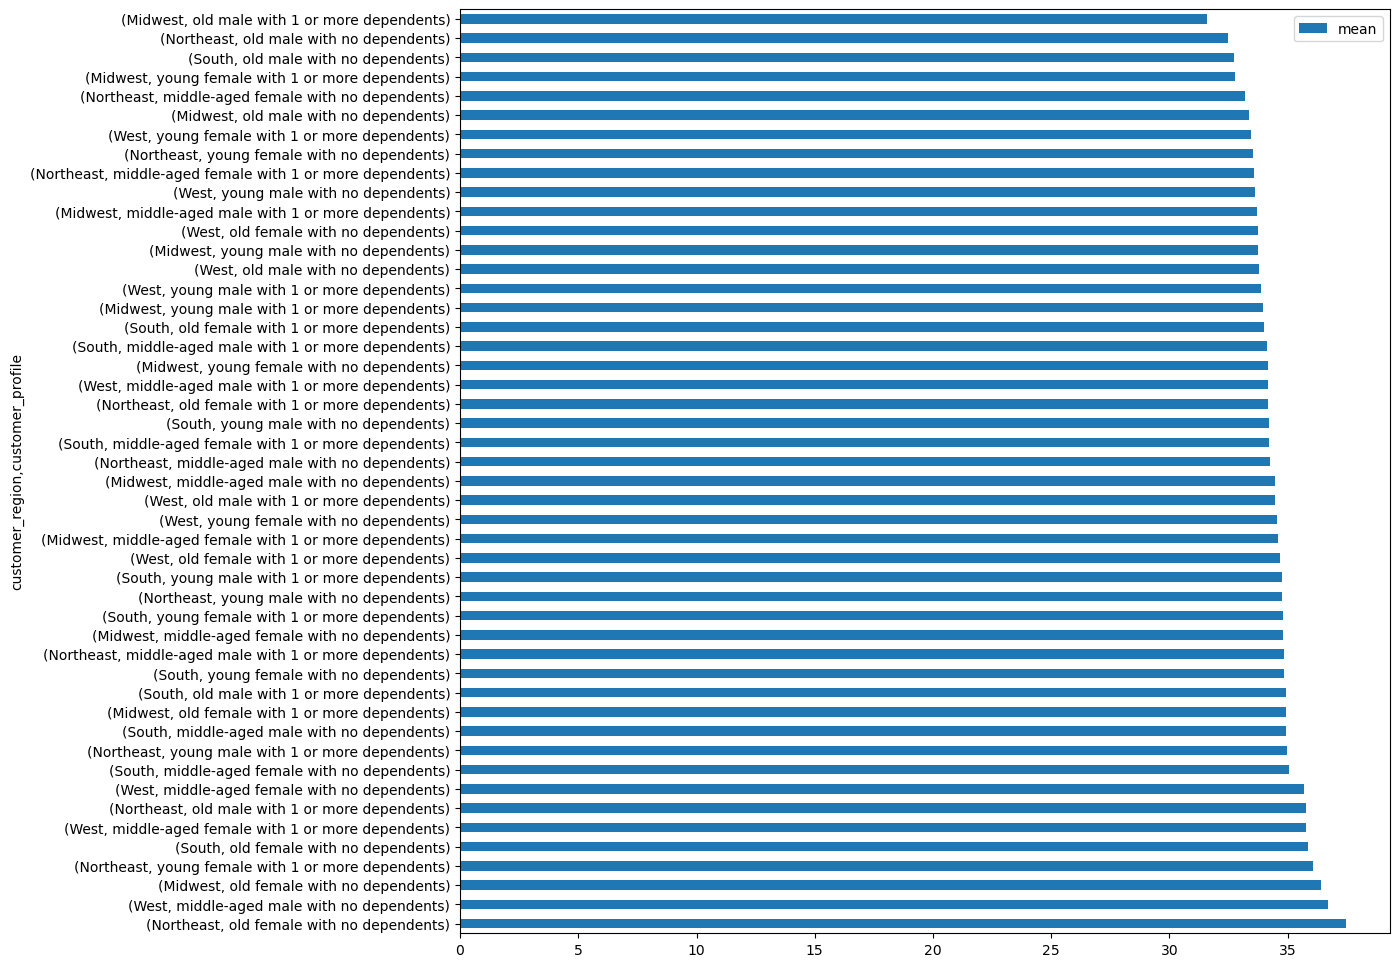

In [70]:
# Bar chart of max order number (number of orders customer has purchased) grouped by 
#      customer region and customer profile sorted by mean column

avg_maxorder_regional_profiling.sort_values(by='mean', ascending=False).plot.barh(
    figsize = (12,12)
    )

In [72]:
# Recheck shape

df_cop.shape

(30964564, 38)